In [1]:
import ampal
import isambard
import isambard.specifications as specs
import isambard.modelling as modelling
import isambard.optimisation.evo_optimizers as ev_opts
from isambard.optimisation.evo_optimizers import Parameter
import budeff

import matplotlib.pyplot as plt
import numpy as np
import itertools
from pprint import pprint
import nglview as nv
from contextlib import redirect_stdout

%matplotlib inline

In [2]:
def show_ball_and_stick(ampal):
    view = nv.show_text(ampal.pdb)
    view.add_ball_and_stick()
    view.remove_cartoon()
    return view

In [3]:
REGISTER_ADJUST = {
    'a': 0,
    'b': 102.8,
    'c': 205.6,
    'd': 308.4,
    'e': 51.4,
    'f': 154.2,
    'g': 257
}

In [4]:
specification = specs.CoiledCoil.from_parameters

In [5]:
sequences = ['GQLKQRRAALKQRIAALKQRRAALKWQIQG', 'GQIQWKLAARRQKLAAIRQKLAARRQKLQG']

In [6]:
parameters = [
    Parameter.static('Oligomeric State', 2),
    Parameter.static('Helix Length', 30),
    Parameter.dynamic('Radius', 5.0, 1.0),
    Parameter.dynamic('Pitch', 200, 60),
    Parameter.dynamic('PhiCA', REGISTER_ADJUST['c'], 27),  
]

In [7]:
default_values = [x.default_value for x in parameters]
print(default_values)

[2, 30, 5.0, 200, 205.6]


In [8]:
def get_bude_total_energy(ampal_object):
    return budeff.get_internal_energy(ampal_object).total_energy

### Genetic Algorithm

In [9]:
opt_ga = ev_opts.GA(specification, sequences, parameters, get_bude_total_energy)

In [10]:
opt_ga.run_opt(100, 30, cores=8)

gen	evals	avg    	std    	min    	max    
0  	70   	-896.98	28.9024	-957.37	-857.29
1  	77   	-928.505	18.4821	-965.76	-891.259
2  	71   	-943.233	8.95178	-975.511	-927.541
3  	63   	-949.351	7.67736	-975.511	-940.491
4  	81   	-955.961	7.48977	-975.511	-944.898
5  	68   	-962.126	5.09439	-979.232	-952.013
6  	68   	-966.313	5.0956 	-980.84 	-959.637
7  	64   	-968.489	5.0457 	-980.84 	-963.505
8  	75   	-971.584	5.51936	-980.84 	-965.137
9  	71   	-974.021	5.301  	-981.123	-966.491
10 	72   	-977.521	2.7392 	-981.123	-968.829
11 	64   	-978.764	0.491839	-981.222	-978.166
12 	64   	-978.948	0.416204	-981.222	-978.576
13 	70   	-979.006	0.405212	-981.222	-978.675
14 	55   	-979.132	0.521825	-981.222	-978.777
15 	84   	-979.594	0.812558	-981.373	-978.879
16 	65   	-979.953	0.836127	-981.395	-978.944
17 	69   	-980.713	0.490706	-981.548	-979.402
18 	66   	-981.047	0.290746	-981.749	-980.41 
19 	81   	-981.262	0.195394	-981.749	-980.908
20 	70   	-981.369	0.151225	-981.769	-981.098
21 	70 

In [11]:
optimized_model_ga = opt_ga.best_model

In [12]:
budeff.get_internal_energy(optimized_model_ga).total_energy

-981.8087273117467

In [13]:
funnel_data_ga = opt_ga.make_energy_funnel_data()

In [14]:
xs = [x[0] for x in funnel_data_ga]
ys = [x[1] for x in funnel_data_ga]
zs = [x[2] for x in funnel_data_ga]

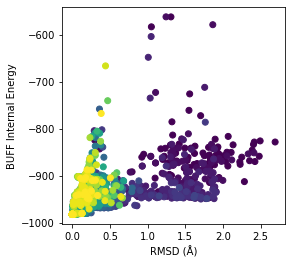

In [15]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(4, 4)
#ax.grid()
ax.scatter(xs, ys, c=zs)
ax.set_xlabel('RMSD (Å)')
ax.set_ylabel('BUFF Internal Energy')

fig.savefig('ga.png')

In [16]:
f = open('apCC-Di-BB-optimized-model-ga.pdb', 'w')

with redirect_stdout(f):
    print(optimized_model_ga.pdb)

### Differential Evolution

In [17]:
opt_de = ev_opts.DE(specification, sequences, parameters, get_bude_total_energy)

/home/eva/anaconda3/lib/python3.9/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/eva/anaconda3/lib/python3.9/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [18]:
opt_de.run_opt(100, 30, cores=8)

gen	evals	avg    	std    	min     	max     
0  	100  	-871.62	28.5671	-960.649	-811.099
1  	100  	-885.817	25.9286	-960.649	-827.242
2  	100  	-897.77 	26.2612	-960.649	-827.242
3  	100  	-910.309	24.0558	-961.141	-859.223
4  	100  	-920.23 	22.4097	-962.229	-873.895
5  	100  	-928.583	19.6971	-966.898	-877.242
6  	100  	-937.703	14.0885	-966.898	-904.818
7  	100  	-943.881	12.2215	-966.898	-911.945
8  	100  	-948.96 	9.74404	-966.898	-913.802
9  	100  	-951.864	7.88232	-966.898	-923.583
10 	100  	-954.847	5.77752	-966.898	-939.289
11 	100  	-957.027	5.10343	-973.855	-940.74 
12 	100  	-959.571	4.72699	-976.339	-950.344
13 	100  	-960.891	4.1295 	-976.339	-953.311
14 	100  	-962.32 	4.25011	-976.339	-953.879
15 	100  	-963.658	4.88407	-976.555	-955.615
16 	100  	-964.513	5.10361	-976.555	-955.615
17 	100  	-965.908	5.36393	-976.555	-957.492
18 	100  	-967.328	5.42481	-976.591	-957.492
19 	100  	-968.705	5.23794	-976.747	-957.492
20 	100  	-970.205	4.81007	-978.767	-961.141
21 	100  	-9

In [19]:
optimized_model_de = opt_de.best_model
budeff.get_internal_energy(optimized_model_de).total_energy

-978.7672004831996

In [20]:
funnel_data_de = opt_de.make_energy_funnel_data()

In [21]:
xs = [x[0] for x in funnel_data_de]
ys = [x[1] for x in funnel_data_de]
zs = [x[2] for x in funnel_data_de]

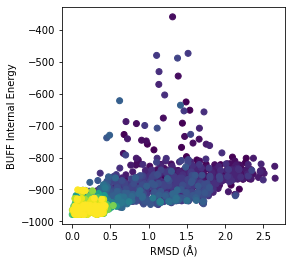

In [22]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(4, 4)
#ax.grid()
ax.scatter(xs, ys, c=zs)
ax.set_xlabel('RMSD (Å)')
ax.set_ylabel('BUFF Internal Energy')

fig.savefig('de.png')

In [23]:
f = open('apCC-Di-BB-optimized-model-de.pdb', 'w')

with redirect_stdout(f):
    print(optimized_model_de.pdb)

### Particle Swarm Optimisation

In [24]:
opt_pso = ev_opts.PSO(specification, sequences, parameters, get_bude_total_energy)

/home/eva/anaconda3/lib/python3.9/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [25]:
opt_pso.run_opt(100, 30, cores=8)

gen	evals	avg     	std    	min     	max    
0  	100  	-799.371	182.272	-948.673	19.5001
1  	75   	-763.589	224.914	-942.033	19.5001
2  	63   	-804.017	168.049	-942.033	-78.1115
3  	88   	-833.715	97.6949	-942.686	-176.05 
4  	87   	-832.584	115.788	-946.935	-399.28 
5  	88   	-821.325	135.553	-950.094	-263.411
6  	41   	-807.186	143.126	-950.094	-175.111
7  	78   	-828.189	97.919 	-924.473	-175.111
8  	94   	-838.609	84.3953	-941.696	-536.601
9  	93   	-847.364	127.189	-940.806	-273.62 
10 	56   	-837.968	118.761	-942.222	-346.481
11 	73   	-795.456	150.169	-943.176	-192.581
12 	85   	-845.046	137.821	-951.134	-192.581
13 	88   	-873.672	58.5755	-949.094	-580.373
14 	92   	-884.263	50.8942	-941.095	-644.165
15 	75   	-872.424	86.7972	-950.174	-273.199
16 	53   	-865.009	93.5021	-969.765	-448.527
17 	67   	-864.178	63.7056	-969.765	-378.059
18 	93   	-866.251	25.8803	-932.122	-786.45 
19 	91   	-872.668	32.1294	-951.583	-775.724
20 	78   	-853.781	96.615 	-942.758	-505.639
21 	51   	-81

In [26]:
optimized_model_pso = opt_pso.best_model
budeff.get_internal_energy(optimized_model_pso).total_energy

-969.7651821792755

In [27]:
funnel_data_pso = opt_pso.make_energy_funnel_data()

In [28]:
xs = [x[0] for x in funnel_data_pso]
ys = [x[1] for x in funnel_data_pso]
zs = [x[2] for x in funnel_data_pso]

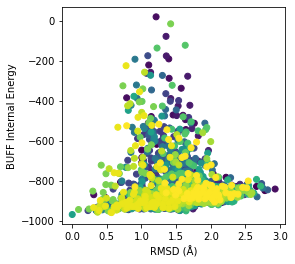

In [29]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(4, 4)
#ax.grid()
ax.scatter(xs, ys, c=zs)
ax.set_xlabel('RMSD (Å)')
ax.set_ylabel('BUFF Internal Energy')

fig.savefig('pso.png')

In [30]:
f = open('apCC-Di-BB-optimized-model-pso.pdb', 'w')

with redirect_stdout(f):
    print(optimized_model_pso.pdb)

### Covariance Matrix Adaptive Evolutionary Strategy

In [31]:
opt_cmaes = ev_opts.CMAES(specification, sequences, parameters, get_bude_total_energy)

/home/eva/anaconda3/lib/python3.9/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/eva/anaconda3/lib/python3.9/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [32]:
opt_cmaes.run_opt(100, 30, cores=8)

gen	evals	avg     	std   	min     	max     
0  	100  	-848.975	53.238	-933.059	-540.353
1  	100  	-863.563	46.3516	-915.278	-521.862
2  	100  	-870.433	81.4737	-944.288	-279.603
3  	100  	-891.54 	60.2967	-954.261	-583.896
4  	100  	-919.734	35.0094	-960.411	-690.715
5  	100  	-937.042	14.6831	-962.086	-879.327
6  	100  	-926.286	35.2185	-973.929	-776.424
7  	100  	-946.307	10.617 	-970.509	-881.069
8  	100  	-946.8  	12.7525	-972.247	-882.19 
9  	100  	-954.262	8.77614	-980.527	-927.468
10 	100  	-954.49 	8.52485	-969.76 	-928.167
11 	100  	-959.232	6.42014	-971.227	-943.06 
12 	100  	-962.448	5.47933	-979.929	-946.999
13 	100  	-959.91 	8.84204	-980.629	-928.749
14 	100  	-961.346	8.96033	-981.253	-929.591
15 	100  	-964.34 	6.26603	-980.791	-942.128
16 	100  	-963.933	14.5874	-980.894	-900.747
17 	100  	-956.572	20.2874	-980.874	-900.938
18 	100  	-968.232	10.7443	-981.517	-930.736
19 	100  	-972.881	8.48262	-981.446	-928.973
20 	100  	-974.366	7.9761 	-981.806	-945.632
21 	100  	-9

In [33]:
optimized_model_cmaes = opt_cmaes.best_model
budeff.get_internal_energy(optimized_model_cmaes).total_energy

-982.5514112788647

In [34]:
funnel_data_cmaes = opt_cmaes.make_energy_funnel_data()

In [35]:
xs = [x[0] for x in funnel_data_cmaes]
ys = [x[1] for x in funnel_data_cmaes]
zs = [x[2] for x in funnel_data_cmaes]

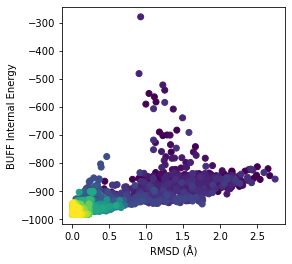

In [36]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(4, 4)
#ax.grid()
ax.scatter(xs, ys, c=zs)
ax.set_xlabel('RMSD (Å)')
ax.set_ylabel('BUFF Internal Energy')

fig.savefig('cmaes.png')

In [37]:
f = open('apCC-Di-BB-optimized-model-cmaes.pdb', 'w')

with redirect_stdout(f):
    print(optimized_model_cmaes.pdb)